In [1]:
# MNB

#Step 1: Import libraries, Load data, spilt data and vectorization

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report, 
    ConfusionMatrixDisplay)

# Load the dataset
file_path ='news-article-categories clean.csv'
data = pd.read_csv(file_path)

# Combine text features into one
data['text'] = data['title'] + " " + data['body']

#Check for missing values and drop them if necessary
data =data.dropna(subset=['text', 'category'])

# Split the data into features and target
X=data['text']  # Combined text feature
y = data['category']  # Target labels

# Split the dataset into train and test sets
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=42)

#Text Vectorization using CountVectorizer
vectorizer= CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)  #vectorize the entire dataset

C:\Users\zobayer\AppData\Local\Temp\ipykernel_8972\2538162922.py:19: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,


Initial MNB Results:
Accuracy: 75.26%
Precision: 75.50%
Recall:    75.26%
F1 Score:  75.26%

Classification Report (Initial Predictions):
                precision    recall  f1-score   support

ARTS & CULTURE       0.84      0.82      0.83      1002
      BUSINESS       0.68      0.60      0.64       501
        COMEDY       0.76      0.68      0.71       376
         CRIME       0.70      0.82      0.76       300
     EDUCATION       0.82      0.80      0.81       490
 ENTERTAINMENT       0.67      0.75      0.71       501
   ENVIRONMENT       0.80      0.81      0.81       501
         MEDIA       0.65      0.64      0.64       347
      POLITICS       0.69      0.76      0.72       501
      RELIGION       0.79      0.86      0.82       501
       SCIENCE       0.82      0.77      0.79       350
        SPORTS       0.88      0.81      0.85       501
          TECH       0.76      0.72      0.74       501
         WOMEN       0.59      0.61      0.60       500

      accuracy     

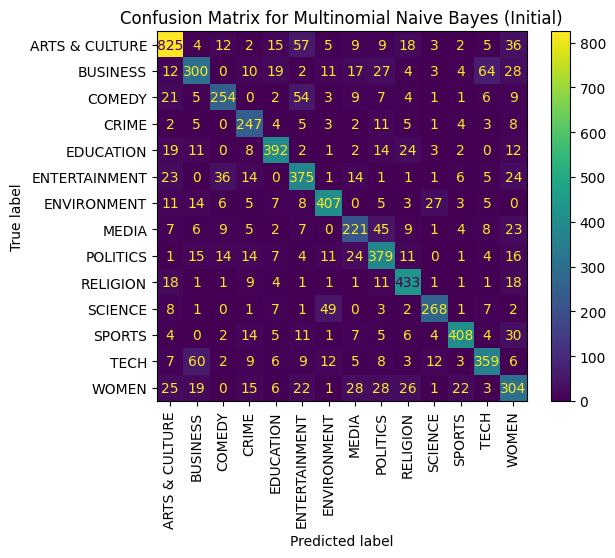

In [2]:
#Step 2:Initialize and train Default MNB and evaluate the performace

# Initialize the Multinomial Naive Bayes model
model = MultinomialNB(alpha=0.1)

# Perform cross-validation (5-folds)
cv_scores= cross_val_score(model, X_vectorized, y, cv=5, scoring='accuracy')
cv_predictions= cross_val_predict(model, X_vectorized, y, cv=5)

#Compute cross-validation metrics
average_accuracy = cv_scores.mean()
precision= precision_score(y, cv_predictions,average='weighted', zero_division=0)
recall= recall_score(y, cv_predictions,average='weighted', zero_division=0)
f1 = f1_score(y, cv_predictions,average='weighted',zero_division=0)

# cross-validation results printing
print("\nInitial MNB Results:")
print(f"Accuracy: {average_accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall:    {recall * 100:.2f}%")
print(f"F1 Score:  {f1 * 100:.2f}%")

#classification report
print("\nClassification Report (Initial Predictions):")
print(classification_report(y, cv_predictions, target_names=data['category'].unique(), zero_division=0))

#confusion matrix
ConfusionMatrixDisplay.from_predictions(y, cv_predictions, xticks_rotation='vertical')
plt.title("Confusion Matrix for Multinomial Naive Bayes (Initial)")
plt.show()

In [3]:
#Step 3: Use Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

#Defining the parameter grid for GridSearchCV
param_grid = {
    'vectorizer__max_features': [500, 1000, 5000],  #setnumber of features
    'vectorizer__ngram_range': [(1, 1), (1, 2)],      # Unigrams and bigrams
    'classifier__alpha': [0.01, 0.1, 1.0, 10.0],    # alpha values
    }

# Create a pipeline 
pipeline = Pipeline([('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())])

# Performing GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

#For saving the best model and parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("\nBest Parameters:")
print(best_params)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END classifier__alpha=0.01, vectorizer__max_features=500, vectorizer__ngram_range=(1, 1); total time=  17.6s
[CV] END classifier__alpha=0.01, vectorizer__max_features=500, vectorizer__ngram_range=(1, 1); total time=   9.5s
[CV] END classifier__alpha=0.01, vectorizer__max_features=500, vectorizer__ngram_range=(1, 1); total time=   9.8s
[CV] END classifier__alpha=0.01, vectorizer__max_features=500, vectorizer__ngram_range=(1, 1); total time=  10.5s
[CV] END classifier__alpha=0.01, vectorizer__max_features=500, vectorizer__ngram_range=(1, 1); total time=   8.0s
[CV] END classifier__alpha=0.01, vectorizer__max_features=500, vectorizer__ngram_range=(1, 2); total time=  15.6s
[CV] END classifier__alpha=0.01, vectorizer__max_features=500, vectorizer__ngram_range=(1, 2); total time=  10.1s
[CV] END classifier__alpha=0.01, vectorizer__max_features=500, vectorizer__ngram_range=(1, 2); total time=   8.7s
[CV] END classifier__alpha


Evaluation Metrics (Tuned Model):
Accuracy:76.58%
Precision: 76.70%
Recall: 76.58%
F1 Score: 76.42%


Classification Report (Tuned Model):
                precision    recall  f1-score   support

ARTS & CULTURE       0.84      0.85      0.85       205
      BUSINESS       0.79      0.65      0.71       114
        COMEDY       0.70      0.78      0.74        74
         CRIME       0.73      0.82      0.78        57
     EDUCATION       0.78      0.84      0.81       108
 ENTERTAINMENT       0.69      0.70      0.69       100
   ENVIRONMENT       0.82      0.74      0.78        97
         MEDIA       0.74      0.67      0.70        67
      POLITICS       0.66      0.76      0.70       103
      RELIGION       0.81      0.90      0.85       101
       SCIENCE       0.72      0.76      0.74        54
        SPORTS       0.85      0.88      0.86       101
          TECH       0.75      0.69      0.72        85
         WOMEN       0.73      0.59      0.65       109

      accuracy    

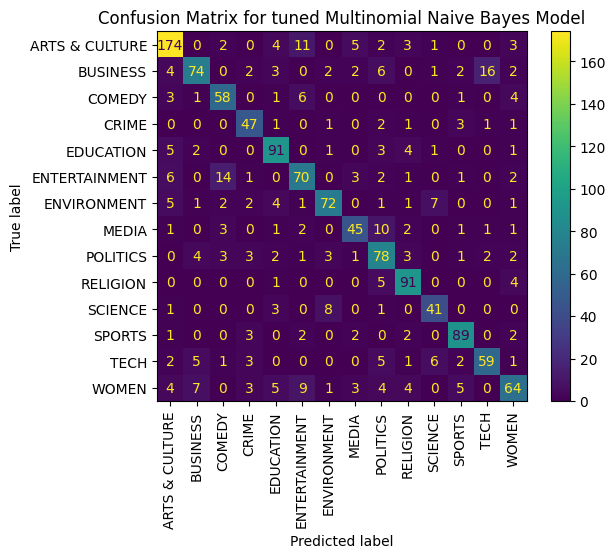

In [4]:
# Step 4: Check the performance again after hyperparameter tuning

# Evaluate the best model on the test data
y_pred_best = best_model.predict(X_test)

# Compute evaluation metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted', zero_division=0)
recall_best = recall_score(y_test, y_pred_best, average='weighted', zero_division=0)
f1_best = f1_score(y_test, y_pred_best, average='weighted', zero_division=0)

# Display evaluation metrics
print("\nEvaluation Metrics (Tuned Model):")
print(f"Accuracy:{accuracy_best * 100:.2f}%")
print(f"Precision: {precision_best * 100:.2f}%")
print(f"Recall: {recall_best * 100:.2f}%")
print(f"F1 Score: {f1_best * 100:.2f}%\n")

#Classification report
print("\nClassification Report (Tuned Model):")
print(classification_report(y_test, y_pred_best, target_names=data['category'].unique(), zero_division=0))

# Displaing confusion matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, xticks_rotation='vertical')
plt.title("Confusion Matrix for tuned Multinomial Naive Bayes Model")
plt.show()


In [5]:
# Save predictions to a CSV file
output_file = 'mnb_grid_search_results.csv'
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_best})
results.to_csv(output_file, index=False)

print(f"Results saved to '{output_file}'")


Results saved to 'mnb_grid_search_results.csv'
